In [1]:
import numpy as np
import matplotlib.pyplot as plt
from multidimga import MultiDimGA
# %matplotlib

In [2]:
"""
f(x1,x2) = e ^ sin(x1^2) + x2, x1 ∈[−2,2],x2∈[0,1].
"""
f = lambda x, y: np.e ** (np.sin(x**2)) + y

intervals = np.array([
    [-2, 2], 
    [0, 1]
])

In [3]:
x = np.linspace(intervals[0][0], intervals[0][1], 100)
y = np.linspace(intervals[1][0], intervals[1][1], 100)

xx, yy = np.meshgrid(x, y)
zz = f(xx, yy)

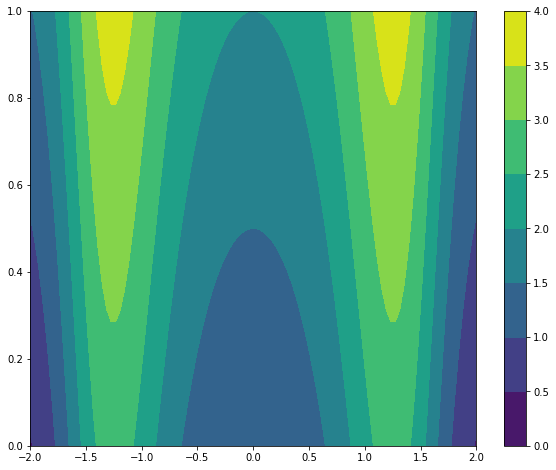

In [4]:
fig = plt.figure(figsize=(10,8))
fig.add_subplot(1, 1, 1)
plt.contourf(xx, yy, zz)
plt.colorbar()

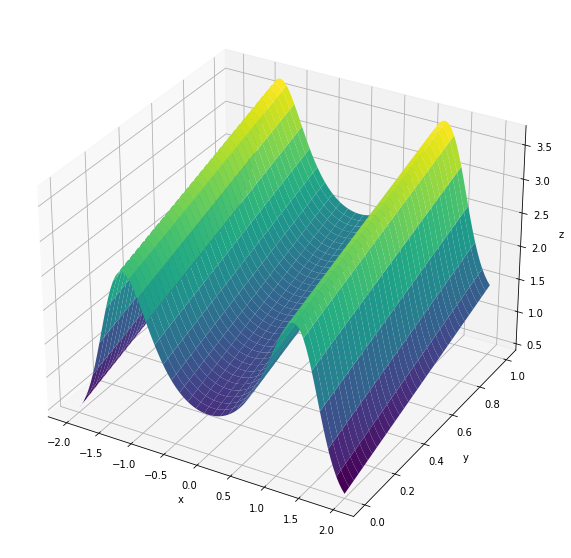

In [5]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1, projection = '3d')
ax.plot_surface(xx, yy, zz, cmap='viridis', rstride=3, cstride=3)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [6]:
h = 1e-8
n = 1000
tournament_n=2
mutation_p=0.1
crossover_p=0.95
max_iter = 200
max_no_conv_iter = 40
min_lifetime=20
max_lifetime=40
reproduction_p=0.06

multi_dim_ga = MultiDimGA()
x, y = multi_dim_ga.solve(f,
                         intervals=intervals, 
                         h=h, 
                         n=n,
                         tournament_n=tournament_n,
                         mutation_p=mutation_p,
                         crossover_p=crossover_p,
                         max_iter=max_iter,
                         max_no_conv_iter=max_no_conv_iter,
                         min_lifetime=min_lifetime,
                         max_lifetime=max_lifetime,
                         reproduction_p=reproduction_p,
                         max_problem=False)

print(f"x1: {x[0]}\nx2: {x[1]}\ny:  {y}")

IntProgress(value=0, max=200)

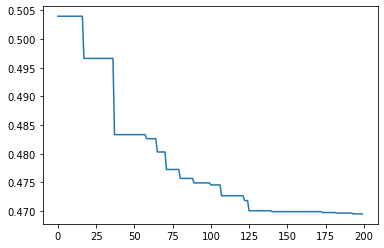

In [8]:
plt.plot(multi_dim_ga.history)
plt.show()

IntProgress(value=0, max=200)

IntProgress(value=0, max=200)

IntProgress(value=0, max=200)

IntProgress(value=0, max=200)

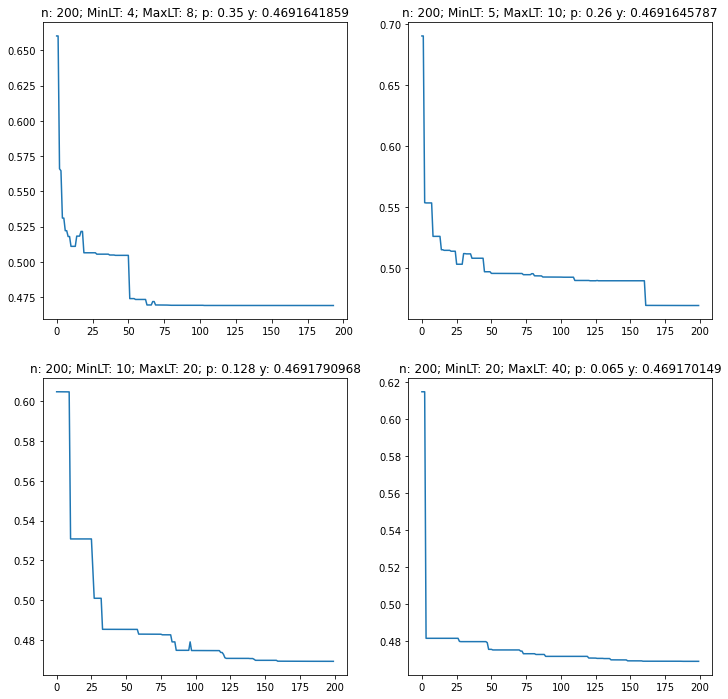

In [17]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
axs_ = axs.ravel()

args = {
  "n":              [200, 200,  200,   200    ],
  "min_lifetime":   [4,    5,    10,    20,   ],
  "max_lifetime":   [8,    10,   20,    40,   ],
  "reproduction_p": [0.35, 0.26, 0.128, 0.065, ]
}


for i in range(len(args["reproduction_p"])):
  x, y = multi_dim_ga.solve(f,
                         intervals=intervals, 
                         h=h, 
                         n=args["n"][i],
                         tournament_n=tournament_n,
                         mutation_p=mutation_p,
                         crossover_p=crossover_p,
                         max_iter=max_iter,
                         max_no_conv_iter=max_no_conv_iter,
                         min_lifetime=args["min_lifetime"][i],
                         max_lifetime=args["max_lifetime"][i],
                         reproduction_p=args["reproduction_p"][i],
                         max_problem=False)
 
  axs_[i].plot(multi_dim_ga.history)
  axs_[i].title.set_text(f'n: {args["n"][i]}; MinLT: {args["min_lifetime"][i]}; MaxLT: {args["max_lifetime"][i]}; p: {args["reproduction_p"][i]} y: {np.round(y, 10)}')
